# SIMPLE Tutorial 2 - Normalising abundances
Like in the previous tutorial we start by importing the simple package and changing the logging level to provide more detailed output.

We then load the model collection that we created in [Tutorial 1]().

In [1]:
import simple
simple.set_logging_level('INFO')

models = simple.load_collection('data/TiFeNiZn.hdf5')

Loading existing file: data/TiFeNiZn.hdf5
Loading file: data/TiFeNiZn.hdf5
Loading model: Ri18_m15 (CCSNe)
Loading model: iniab2.0E-02GN93 (IsoRef)
Loading model: W17 (IsoRef)
Loading model: Ri18_m20 (CCSNe)
Loading model: Ri18_m25 (CCSNe)
Loading model: Pi16_m15 (CCSNe)
Loading model: iniab2.0E-02GN93_Lo03 (IsoRef)
Loading model: Pi16_m20 (CCSNe)
Loading model: Pi16_m25 (CCSNe)
Loading model: La22_m15 (CCSNe)
Loading model: La22_m20 (CCSNe)
Loading model: La22_m25 (CCSNe)
Loading model: Si18_m15 (CCSNe)
Loading model: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
Loading model: Si18_m20 (CCSNe)
Loading model: Si18_m25 (CCSNe)
Loading model: Ra02_m15 (CCSNe)
Loading model: rau_solar_ref (IsoRef)
Loading model: Ra02_m20 (CCSNe)
Loading model: Ra02_m25 (CCSNe)
Loading model: LC18_m15 (CCSNe)
Loading model: iniab1.3E-02As09_As09_merged (IsoRef)
Loading model: LC18_m20 (CCSNe)
Loading model: LC18_m25 (CCSNe)
Time to load file: 0:00:00.101375


## Internal Normalisation
The isotope composition of natural samples often contain both mass-dependent and mass-indepdendent isotope variations. The magnitude of mass-dependent fractionation is often significantly larger than the effects from mass-independent processses such as the heterogeneous distribution of nucleosynthetic material is solar system materials.  

Internal normalisation is a method frequently employed to remove the mass-dependent signals from isotope data so that the mass-independent isotope signatures can be studied.

$$ {R}_{ij} = {r}_{ij} * {m}_{ij}^{\beta} $$


$$
\epsilon R^{\mathrm{SMP}}_{ij} = {\left[{\left(\frac{r^{\mathrm{SMP}}_{ij}}{R^{\mathrm{STD}}_{ij}}\right)}
{\left(\frac{r^{\mathrm{SMP}}_{kj}}{R^{\mathrm{STD}}_{kj}}\right)}^{-Q_i} - 1
\right]} \times 10^4
$$

See [Lugaro et al. (2003)]()

In [2]:
models.internal_normalisation('Ni-58*/Ni-61*')

Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ('Ni-58*/Ni-61*',) with an enrichment factor of (1,)
Internally normalising 2158 rows using the largest offset method.
695 rows out of 2158 have largest offsets smaller than 1 at the minimum dilution factor of 0.1. These rows are set to nan.
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ('Ni-58*/Ni-61*',) with an enrichment factor of (1,)
Internally normalising 2088 rows using the largest offset method.
773 rows out of 2088 have largest offsets smaller than 1 at the minimum dilution factor of 0.1. These rows are set to nan.
Converting

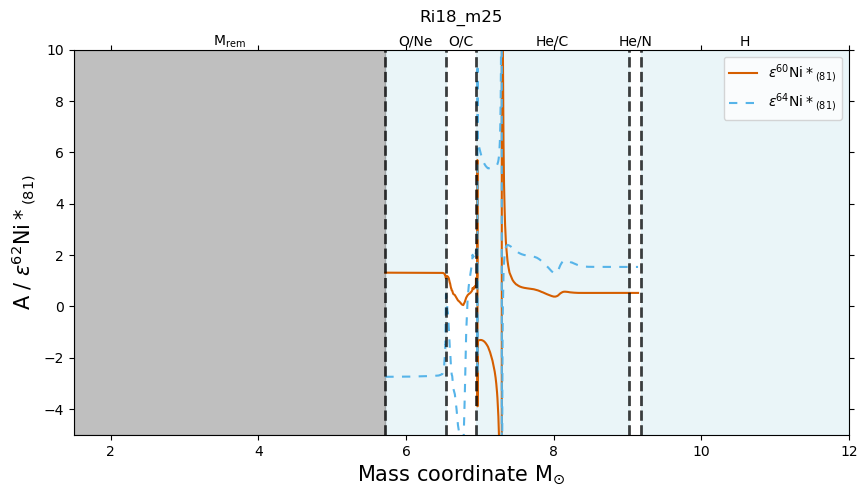

In [9]:
simple.ccsne.plot_intnorm(models, 'Ni-60*/Ni-62*, Ni-64*/Ni-62*', 
                            where='.mass==25 & .dataset == Ri18', 
                          ax_xlim=(1.5, 12), ax_ylim=(-5,10), fig_size= (10,5));

## Simple Normalisation

In [4]:
models.simple_normalisation('Ni-58*')

Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-58* with an enrichment factor of 1
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-58* with an enrichment factor of 1
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-58* with an enrichment factor of 1
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by 

## Histogram of slopes
How to create rose diagrams

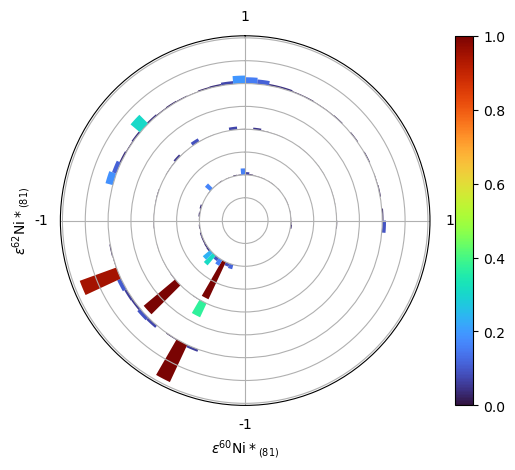

In [5]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02')

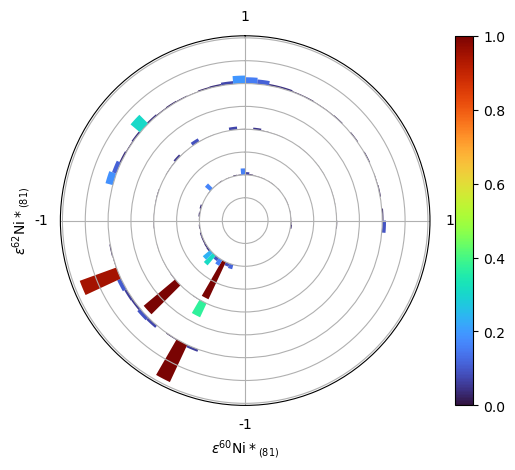

In [6]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02')

Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


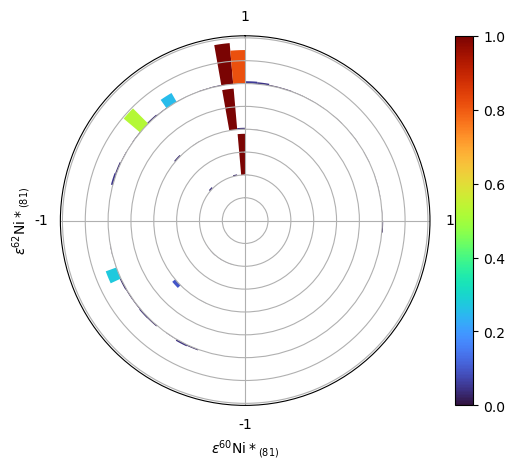

In [7]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02', weights='Ni*')